C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in square
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


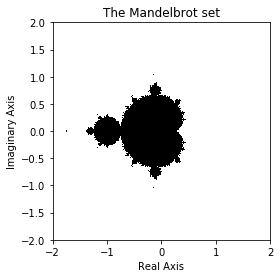

In [5]:
# assignment 2, question 1 part 1

import numpy as np
import matplotlib.pyplot as plt


def mandelbrot(n_max, epsilon, n):
    ''' Function that builds the Mandelbrot set.
    Args:
    n_max: the max number of iterations,
    epsilon:  number to check for divergence,
    n: how many points in either dimension

    Returns:
    a 2d array of the convergant/divergant mandelbrot set'''

    # grid in the complex plane
    y = np.linspace(-2, 2, n)
    x = np.linspace(-2j, 2j, n)

    c = x[:, np.newaxis] + y[np.newaxis, :]

    # iteration
    z0 = 0.0
    z = c  # z1 = c, starts on the first iteration
    for j in range(n_max):

        z = z**2 + c

    # check for convergance and build subspace
    mandelbrot = (np.abs(z)) < epsilon
    return mandelbrot


mandelbrot = mandelbrot(50, 50.0, 1000,)


plt.imshow(mandelbrot, extent=[-2, 2, -2, 2], cmap='binary',)
plt.title('The Mandelbrot set')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in square
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in absolute


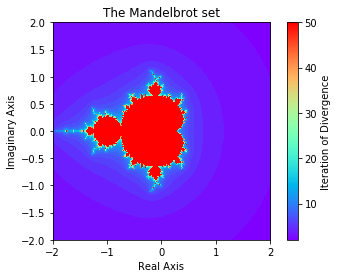

In [9]:
# assignment 2 question 1 part 2


def mandelbrot_color(n_max, epsilon, n):
    ''' Function that builds the Mandelbrot set.
    Args:
    n_max: the max number of iterations,
    epsilon: number to check for divergence,
    n: how many points in either dimension

    Returns:
    a 2d array of the convergant/divergant mandelbrot set.
    Array values correspond to iteratiion of divergence, or 0 if converges'''

    # grid in the complex plane
    x = np.linspace(-2, 2, n)
    y = np.linspace(-2j, 2j, n)
    c = y[:, np.newaxis] + x[np.newaxis, :]

    mandelbrot_color = np.zeros((n, n))

    # iteration
    z0 = 0.0
    z = c  # z1 = c, starts on the first iteration
    for j in range(n_max):

        z = z**2 + c

        for i in range(n):  # nested for loop to check if divergent
            for m in range(n):
                if (np.abs(z[i][m])) > epsilon:
                    if mandelbrot_color[i][m] == 0:
                        mandelbrot_color[i][m] = (j + 1)  # record iteration

    for i in range(n):  # nested for loop to increase convergent iteration
        for m in range(n):
            if mandelbrot_color[i][m] == 0:
                mandelbrot_color[i][m] = n_max
    return mandelbrot_color


mandelbrot_color = mandelbrot_color(50, 50.0, 400,)


plt.imshow(mandelbrot_color, cmap='rainbow',  extent=[-2, 2, -2, 2])
plt.colorbar().set_label('Iteration of Divergence')
plt.title('The Mandelbrot set')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
C:\Users\afine\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in square


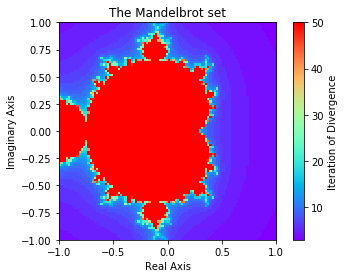

In [68]:
# assignment 2 question 1 part 3, zoom


def mandelbrot_color(n_max, epsilon, n):
    ''' Function that builds the Mandelbrot set.
    Args:
    n_max: the max number of iterations,
    epsilon: number to check for divergence,
    n: how many points in either dimension

    Returns:
    a 2d array of the convergant/divergant mandelbrot set.
    Array values correspond to iteratiion of divergence, or 0 if converges'''

    # grid in the complex plane
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1j, 1j, n)
    c = y[:, np.newaxis] + x[np.newaxis, :]

    mandelbrot_color = np.zeros((n, n))

    # iteration
    z0 = 0.0
    z = c  # z1 = c, starts on the first iteration
    for j in range(n_max):

        z = z**2 + c

        for i in range(n):  # nested for loop to check if divergent
            for m in range(n):
                if (np.abs(z[i][m])) > epsilon:
                    if mandelbrot_color[i][m] == 0:
                        mandelbrot_color[i][m] = (j + 1)  # record iteration

    for i in range(n):  # nested for loop to increase convergent iteration
        for m in range(n):
            if mandelbrot_color[i][m] == 0:
                mandelbrot_color[i][m] = n_max

    return mandelbrot_color


mandelbrot_color = mandelbrot_color(50, 50.0, 100,)


plt.imshow(mandelbrot_color, cmap='rainbow',  extent=[-1, 1, -1, 1])
plt.colorbar().set_label('Iteration of Divergence')
plt.title('The Mandelbrot set')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


In [22]:
# Assignment 2 question 2 part 1
from scipy.integrate import odeint

# SIR model
# S(t) = not yet infected
# I(t) = infected
# R(t) = recoverd/ inmune


def model_sir(z, t, b, y):
    '''Models the sir system of ODEs:

    Args:
    z = vector of s(t), i(t), r(t)
    t = time steps defult is 1000 change in sir function
    b = beta from SIR model
    y = gamma from SIR model

    Returns:
    A list of dsdt, didt, drdt'''

    s, i, r = z
    n = 1000.0  # given in assignment

    dsdt = -1.0 * b * s * i / n
    didt = b * s * i / n - y * i
    drdt = y * i
    dzdt = [dsdt, didt, drdt]
    return dzdt


def sir(b, y, z0):
    '''Solves the SIR model
    Args:
    b = beta from SIR model
    y = gamma from SIR model
    z0 = vector of inital conditions [s0,i0,r0]

    Returns:
    z = vector of s(t), i(t), r(t)]'''

    t = np.linspace(0, 1000)
    z = odeint(model_sir, z0, t, args=(b, y))
    return z


<function matplotlib.pyplot.show(*args, **kw)>

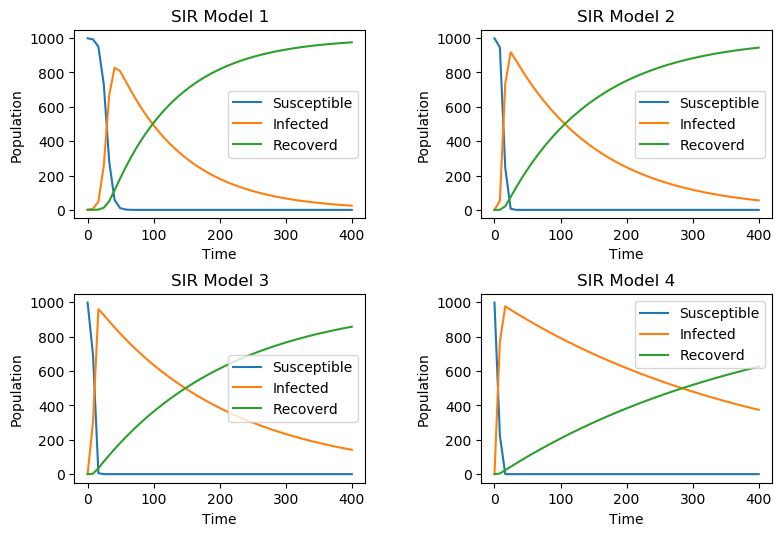

In [47]:
# Assignment 2 question 2 part 1, 4 plots

# z0, b, y
z0 = [999, 1, 0]
b = [0.1, 0.2, 0.3, 0.4]
y = [0.004, 0.003, 0.002, 0.001]
t = np.linspace(0, 400)

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(9, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# plot 1
z1 = sir(b[0], y[0], z0)

ax[0, 0].plot(t, z1[:, 0], label='Susceptible')
ax[0, 0].plot(t, z1[:, 1], label='Infected')
ax[0, 0].plot(t, z1[:, 2], label='Recoverd')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Population')
ax[0, 0].set_title('SIR Model 1')
ax[0, 0].legend()

# plot 1
z2 = sir(b[1], y[1], z0)

ax[0, 1].plot(t, z2[:, 0], label='Susceptible')
ax[0, 1].plot(t, z2[:, 1], label='Infected')
ax[0, 1].plot(t, z2[:, 2], label='Recoverd')
ax[0, 1].set_xlabel('Time')
ax[0, 1].set_ylabel('Population')
ax[0, 1].set_title('SIR Model 2')
ax[0, 1].legend()

# plot 3
z3 = sir(b[2], y[2], z0)

ax[1, 0].plot(t, z3[:, 0], label='Susceptible')
ax[1, 0].plot(t, z3[:, 1], label='Infected')
ax[1, 0].plot(t, z3[:, 2], label='Recoverd')
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Population')
ax[1, 0].set_title('SIR Model 3')
ax[1, 0].legend()

# plot 4
z4 = sir(b[3], y[3], z0)

ax[1, 1].plot(t, z4[:, 0], label='Susceptible')
ax[1, 1].plot(t, z4[:, 1], label='Infected')
ax[1, 1].plot(t, z4[:, 2], label='Recoverd')
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Population')
ax[1, 1].set_title('SIR Model 4')
ax[1, 1].legend()

plt.show


In [29]:
# assignment 2 bonus part 1
from scipy.integrate import odeint

# SIR model
# S(t) = not yet infected
# I(t) = infected
# R(t) = recoverd/ inmune
# l(t) = dead


def model_sird(z, t, b, y, u):
    '''Models the sir system of ODEs:

    Args:
    z = vector of s(t), i(t), r(t), l(t)
    t = time steps defult is 1000 change in sir function
    b = beta from SIRD model
    y = gamma from SIRD model
    u = mu from SIRD model

    Returns:
    A list of dsdt, didt, drdt, dldt'''

    s, i, r, l = z
    n = 1000.0
    dsdt = -1.0 * b * s * i / n
    didt = b * s * i / n - y * i - u * i
    drdt = y * i
    dldt = u*i
    dzdt = [dsdt, didt, drdt, dldt]
    return dzdt


def sird(b, y, u, z0):
    '''Solves the SIRD model
    Args:
    b = beta from SIRD model
    y = gamma from SIRD model
    z0 = vector of inital conditions [s0,i0,r0,l0]

    Returns:
    z = vector of s(t), i(t), r(t), l(t)]'''

    t = np.linspace(0, 1000)
    z = odeint(model_sird, z0, t, args=(b, y, u))
    return z


<function matplotlib.pyplot.show(*args, **kw)>

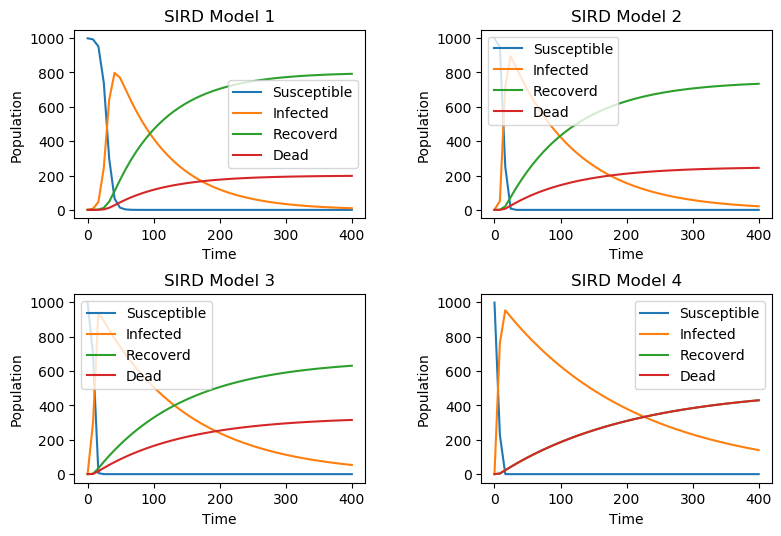

In [48]:
# Assignment 2 question 2 bonus plots

# info for SIRD models
z0 = [999, 1, 0, 0]
b = [0.1, 0.2, 0.3, 0.4]
y = [0.004, 0.003, 0.002, 0.001]
u = 0.001
t = np.linspace(0, 400)

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(9, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# plot 1
z1 = sird(b[0], y[0], u, z0)

ax[0, 0].plot(t, z1[:, 0], label='Susceptible')
ax[0, 0].plot(t, z1[:, 1], label='Infected')
ax[0, 0].plot(t, z1[:, 2], label='Recoverd')
ax[0, 0].plot(t, z1[:, 3], label='Dead')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Population')
ax[0, 0].set_title('SIRD Model 1')
ax[0, 0].legend()

# plot 2
z2 = sird(b[1], y[1], u, z0)

ax[0, 1].plot(t, z2[:, 0], label='Susceptible')
ax[0, 1].plot(t, z2[:, 1], label='Infected')
ax[0, 1].plot(t, z2[:, 2], label='Recoverd')
ax[0, 1].plot(t, z2[:, 3], label='Dead')
ax[0, 1].set_xlabel('Time')
ax[0, 1].set_ylabel('Population')
ax[0, 1].set_title('SIRD Model 2')
ax[0, 1].legend()

# plot 3
z3 = sird(b[2], y[2], u, z0)

ax[1, 0].plot(t, z3[:, 0], label='Susceptible')
ax[1, 0].plot(t, z3[:, 1], label='Infected')
ax[1, 0].plot(t, z3[:, 2], label='Recoverd')
ax[1, 0].plot(t, z3[:, 3], label='Dead')
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Population')
ax[1, 0].set_title('SIRD Model 3')
ax[1, 0].legend()

# plot 4
z4 = sird(b[3], y[3], u, z0)

ax[1, 1].plot(t, z4[:, 0], label='Susceptible')
ax[1, 1].plot(t, z4[:, 1], label='Infected')
ax[1, 1].plot(t, z4[:, 2], label='Recoverd')
ax[1, 1].plot(t, z4[:, 3], label='Dead')
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Population')
ax[1, 1].set_title('SIRD Model 4')
ax[1, 1].legend()

plt.show
